# Unsupervised Company Clustering

## Objective

The objective to this project is to come up with a solution that uses a machine learning algorithm to cluster customer data and label them, and based off of those clusters identify what the ideal customer would be for the company.

This problem is an unsupervised learning problem because the data will not have labels, and will need to be clustered to give instances labels.

## Performance Measure

For this solution, I will be using Silhouette Scores to measure the machine learning algorithms that will perform clustering. Silhoutte scores accomplish performance measuring by measuring how well each data point fits into its assigned cluster compared to other clusters 

# Obtain and Examine Dataset

The dataset being used for this solution is the Customer Personality Analysis dataset uploaded by user Akash Patel on Kaggle. The dataset can be found at https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Datasets/marketing_campaign.csv')

In [3]:
np.random.seed(42)

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [7]:
test = df.copy()

In [8]:
df_cat = test.select_dtypes(include=[object])

In [9]:
df_cat.head()

,Education,Marital_Status,Dt_Customer
0,Graduation,Single,4/9/2012
1,Graduation,Single,8/3/2014
2,Graduation,Together,21-08-2013
3,Graduation,Together,10/2/2014
4,PhD,Married,19-01-2014


In [10]:
df_cat['Dt_Customer'].value_counts()

31-08-2012    12
12/9/2012     11
14-02-2013    11
12/5/2014     11
20-08-2013    10
              ..
5/8/2012       1
18-11-2012     1
25-05-2013     1
14-04-2013     1
9/1/2014       1
Name: Dt_Customer, Length: 663, dtype: int64

In [11]:
df_cat = df_cat.drop("Dt_Customer", axis=1)

# Data Cleaning and Dimensionality Reduction

In [12]:
from sklearn.preprocessing import OneHotEncoder

hot_encode = OneHotEncoder(sparse=False)

df_encode = hot_encode.fit_transform(df_cat)

In [13]:
hot_encode.categories_

[array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object),
 array(['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together',
        'Widow', 'YOLO'], dtype=object)]

In [14]:
data = df.copy()

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

hot_enc = OneHotEncoder(sparse=False)
my_pca = PCA(n_components=3)

cat_pipe = Pipeline([
    ('encode', hot_enc),
    ('scaler', StandardScaler())
])

num_pipe = Pipeline([
    ('scaler', StandardScaler())
])

In [16]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer([
        ("Numerical", num_pipe, make_column_selector(dtype_include=np.number)),
        ("Object", cat_pipe, make_column_selector(dtype_include=object))
    ])
preprocessing

ColumnTransformer(transformers=[('Numerical',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8e30cda820>),
                                ('Object',
                                 Pipeline(steps=[('encode',
                                                  OneHotEncoder(sparse=False)),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8e30cda850>)])

In [17]:
data = data.dropna()
data = data.drop("Dt_Customer", axis=1)
X = preprocessing.fit_transform(data)

In [18]:
pca_data = my_pca.fit_transform(X)
pd_pca = pd.DataFrame(pca_data)

In [19]:
pd_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2216 non-null   float64
 1   1       2216 non-null   float64
 2   2       2216 non-null   float64
dtypes: float64(3)
memory usage: 52.1 KB


# Determining the Number of Clusters

At first, I wanted to utilize Bayesian Gaussian Mixture clustering to determine the necessary number of clusters, but it did not yeild good results so I decided to use the elbow method to determine the number of clusters. 

In [20]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=20, random_state=42)
bgm.fit(pca_data)
bgm.weights_.round(2)

array([0.11, 0.18, 0.09, 0.12, 0.06, 0.09, 0.2 , 0.1 , 0.  , 0.04])

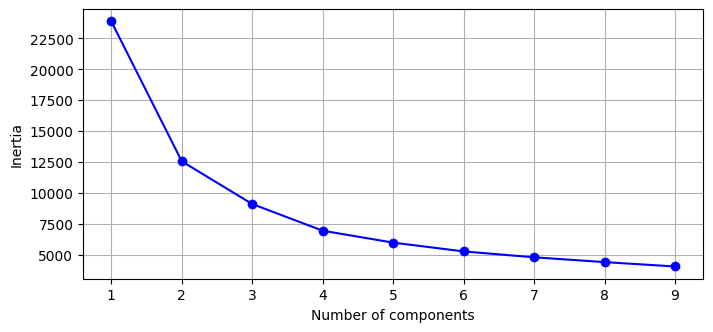

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(pca_data)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("Number of components")
plt.ylabel("Inertia")


plt.grid()
plt.show()

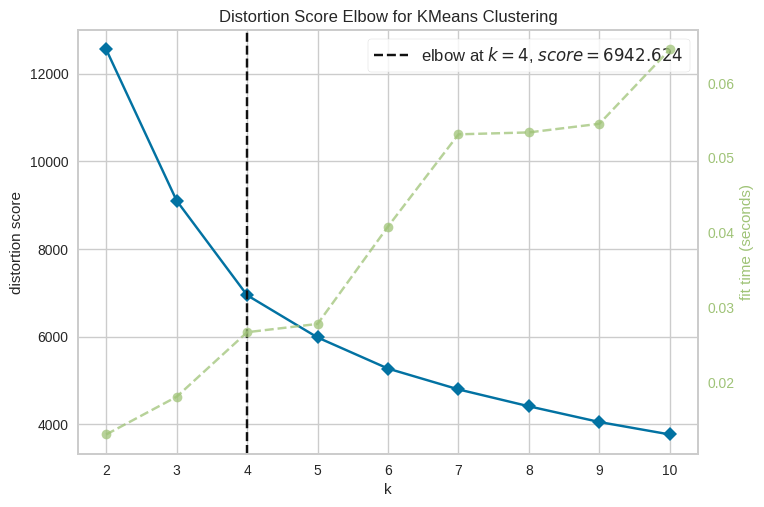

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
from yellowbrick.cluster import KElbowVisualizer

Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_data)
Elbow_M.show()

# Implement Clustering

After determining the necessary number of clusters, I used a couple of clustering models in scikit learn and used the silhoutte score performance measure to determine which model I will use. 

In [23]:
import sklearn.cluster as cluster
import sklearn.mixture as mixture

clustering_methods = [cluster.KMeans,
                      cluster.AgglomerativeClustering,
                      cluster.DBSCAN,
                      mixture.GaussianMixture,
                      cluster.MiniBatchKMeans,
                      cluster.Birch
                     ]

data_arg = [(),(),(),(),(),(),()]

clustering_para = [{'n_clusters':4},
                   {'n_clusters':4, 'linkage':'ward'},
                   {'eps':1, 'min_samples':2},
                   {'n_components' : 4, 'n_init' : 10},
                   {'n_clusters':4},
                   {'threshold' : 0.01, 'n_clusters':4}
                  ]

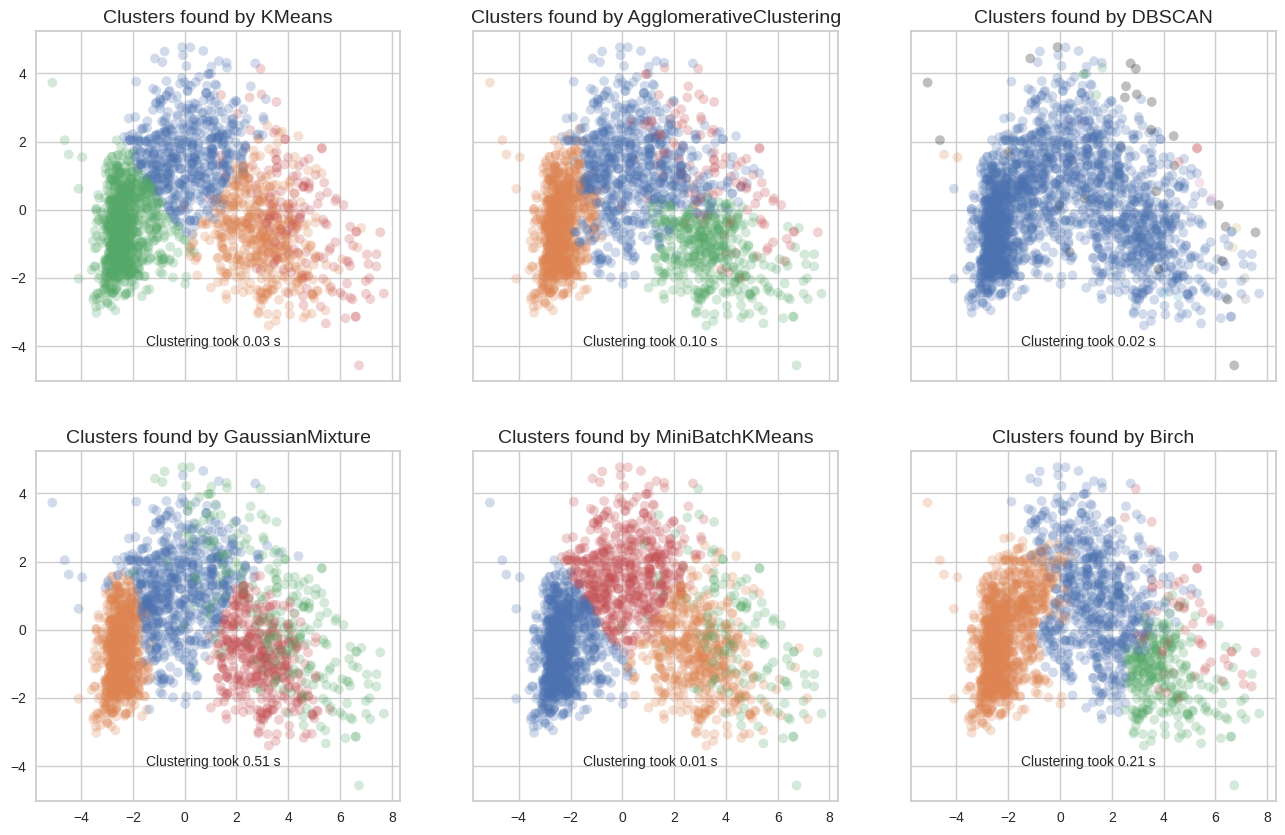

In [24]:
import seaborn as sns
import time

plot_kwds = {'alpha' : 0.25, 's' : 50, 'linewidths':0}
clusters_series = []

def plot_clusters(data, algorithms, args, kwds, axs):
    for j, i in enumerate(axs):
        algorithm = algorithms[j]
        start_time = time.time()
        labels = algorithm(*args[j], **kwds[j]).fit_predict(data)
        end_time = time.time()
        clusters_series.append(labels)
        
        palette = sns.color_palette('deep', np.unique(labels).max() + 1)
        colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]        
        i.scatter(data.iloc[:,0], data.iloc[:,1],c=colors,  **plot_kwds)
        i.set_title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=14)
        i.text(-1.5, -4, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=10)
    
    
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 10), sharex=True, sharey=True)
axs = axs.flatten()


plot_clusters(data=pd_pca, 
              algorithms=clustering_methods, 
              args=data_arg, 
              kwds=clustering_para, 
              axs=axs)
fig.savefig('model_plot.png')

In [25]:
#Dsiplays saved image of figure in case Rise does not display original well
'''from PIL import Image
image = Image.open('model_plot')
image.show()'''

"from PIL import Image\nimage = Image.open('model_plot')\nimage.show()"

## Silhoutte Scores

In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score

for method, params in zip(clustering_methods, clustering_para):
    model = method(**params)
    y_pred = model.fit_predict(pd_pca)
    score = silhouette_score(pd_pca, y_pred)
    print(f"Silhouette score for {type(model).__name__}: {score:.3f}")

Silhouette score for KMeans: 0.401
Silhouette score for AgglomerativeClustering: 0.352
Silhouette score for DBSCAN: -0.054
Silhouette score for GaussianMixture: 0.342
Silhouette score for MiniBatchKMeans: 0.407
Silhouette score for Birch: 0.370


## Decision to use KMeans Clustering Model

In [27]:
data['Clusters'] = clusters_series[0]

In [28]:
import matplotlib.colors
pal = ['#009473', '#00537c', '#b4b4b4', '#da3e21']
cmap = matplotlib.colors.ListedColormap(pal)

In [29]:
import plotly.graph_objects as go
x = pd_pca[0]
y = pd_pca[1]
z = pd_pca[2]

fig = go.Figure(data=[go.Scatter3d(
    x=x,y=y,z=z,mode='markers',
    marker=dict(size=4,color=data['Clusters'],colorscale='Viridis',opacity=0.8))])

fig.update_layout( title={'text': "3D Visualization of Clusters",'y':0.9,
        'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  margin=dict(l=200, r=220, b=0, t=0))
fig.show()

## Examine Clusters

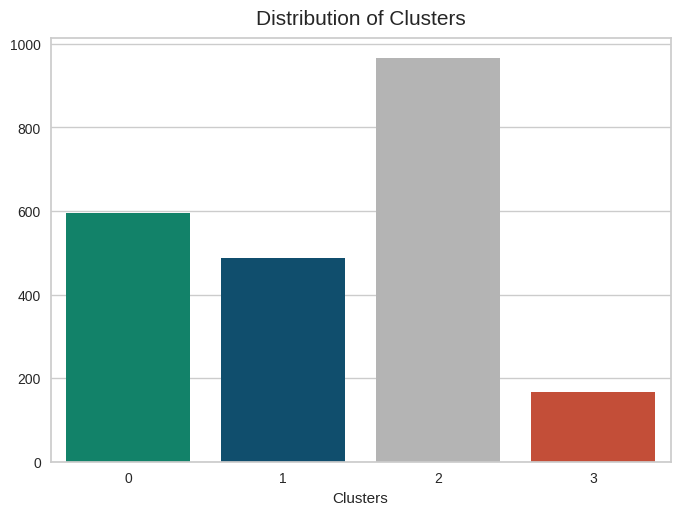

In [30]:
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution of Clusters", pad=10, size = 15)
plt.xlabel('Clusters')
plt.ylabel('')
plt.show()

In [31]:
data['Spent'] = data['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

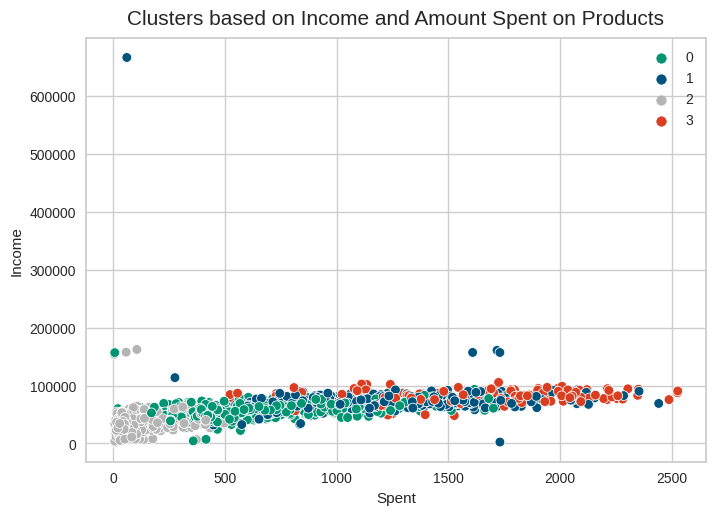

In [32]:
pl = sns.scatterplot(data = data, x = data['Spent'], y = data['Income'], hue = data['Clusters'], palette = pal)
pl.set_title('Clusters based on Income and Amount Spent on Products', pad=10, size=15)
plt.legend()
plt.show()

In [33]:
data['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [34]:
data = data.drop(data[data['Income'] == 666666.000000].index)

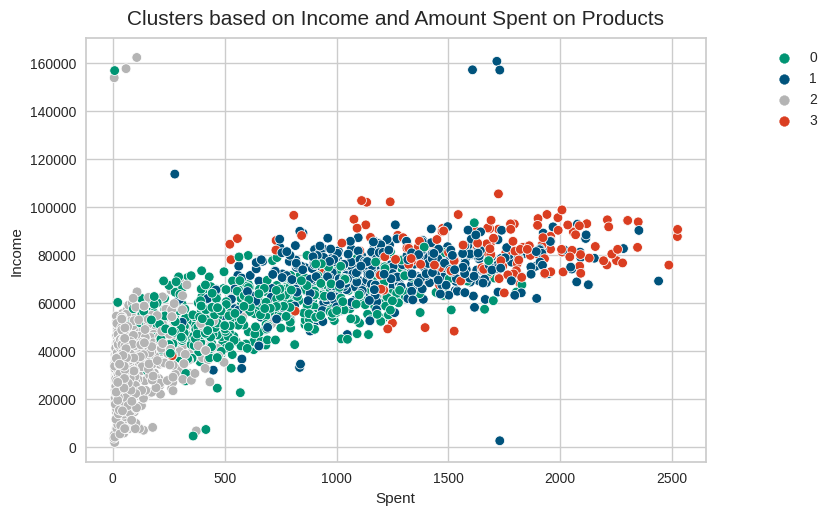

In [35]:
pl = sns.scatterplot(data = data, x = data['Spent'], y = data['Income'], hue = data['Clusters'], palette = pal)
pl.set_title('Clusters based on Income and Amount Spent on Products', pad=10, size=15)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.2, 1))
plt.show()

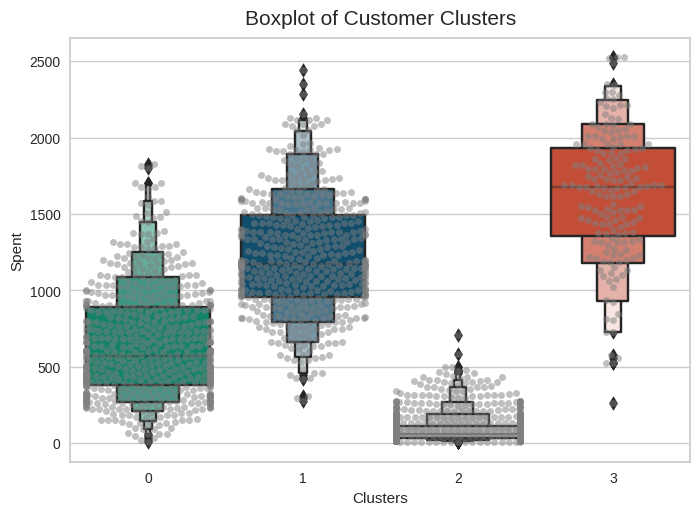

In [36]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "gray", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
pl.set_title("Boxplot of Customer Clusters", pad=10, size=15)
plt.show()

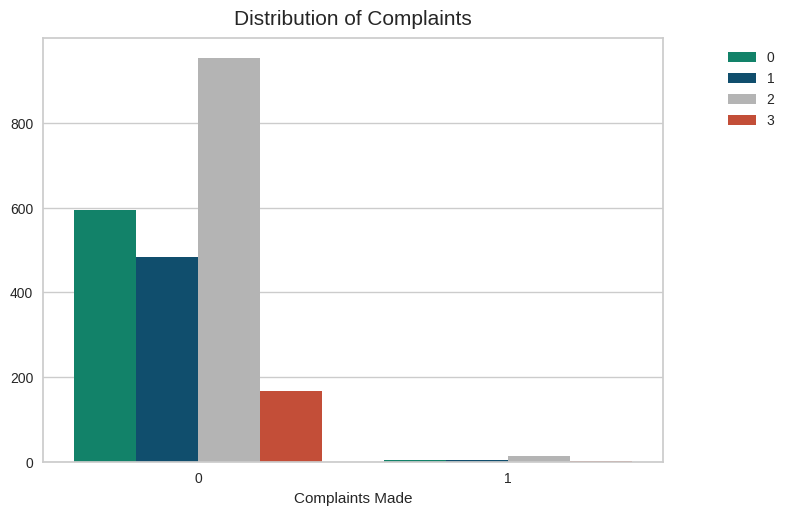

In [37]:
pl = sns.countplot(x=data["Complain"], hue = data['Clusters'], palette= pal)
pl.set_title("Distribution of Complaints", pad=10, size = 15)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.2, 1))
plt.xlabel('Complaints Made')
plt.ylabel('')
plt.show()

# Customer Clusters Profiling

## Product Spending

In [38]:
data = data.rename(columns = {'MntWines' : 'Wines',
                              'MntFruits' : 'Fruits',
                              'MntMeatProducts' : 'Meat',
                              'MntFishProducts' : 'Fish',
                              'MntSweetProducts' : 'Sweets',
                              'MntGoldProds' : 'Gold'})

In [39]:
spending_by_product = data.groupby('Clusters')[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']].sum()
spending_by_product = spending_by_product.transpose()
spending_by_product = spending_by_product.reset_index()
spending_by_product = spending_by_product.rename(columns = {'index': 'Category'})

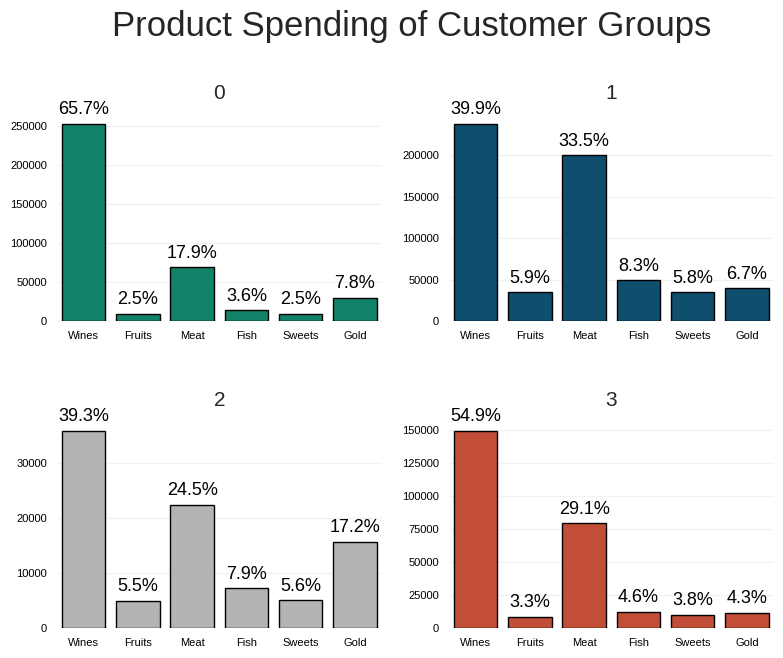

In [40]:
fig = plt.figure(figsize=(8, 6)) 
k = 1
cl = [0,1,2,3]
for i in cl:
    asset = spending_by_product[['Category', i]]
    plt.subplot(2, 2, k)
    plt.title(i, size = 15, x = 0.5, y = 1.03)
    plt.grid(color = 'gray', linestyle = '-', axis = 'y', alpha = 0.1)
    cluster_color = pal[k-1]
    a = sns.barplot(data = asset, x = 'Category', y = i, color = cluster_color, linestyle = "-", linewidth = 1, edgecolor = "black")
    plt.xticks(size = 8, color = 'black')
    plt.yticks(size = 8, color = 'black')
    plt.xlabel('')
    plt.ylabel('')
    for p in a.patches:
        x_pos = p.get_x() + p.get_width() / 2
        y_pos = p.get_height()  
        percentage = round((y_pos / sum(asset[i])) * 100, 1)
        a.annotate(
            f'{percentage}%', 
            xy=(x_pos, y_pos), 
            ha='center', va='center', 
            size=13, 
            color='black',
            xytext = (0, 10), 
            textcoords = 'offset points')
    for spine in ['right', 'top', 'left', 'bottom']:
        a.spines[spine].set_visible(False)  
    k += 1
plt.figtext(0.15, 1.05, 'Product Spending of Customer Groups', size = 25)
fig.tight_layout(h_pad = 3)
fig.savefig('product_plot.png')
plt.show()

In [41]:
#Displays saved image of figure in case Rise does not display original well
'''from PIL import Image
image = Image.open('product_plot')
image.show()'''

"from PIL import Image\nimage = Image.open('product_plot')\nimage.show()"

## Spending Method

In [42]:
data = data.rename(columns = {'NumStorePurchases' : 'Store',
                              'NumCatalogPurchases' : 'Catalog',
                              'NumWebPurchases' : 'Web Store'})

spending_by_store = data.groupby('Clusters')[['Store', 'Web Store', 'Catalog']].sum()
spending_by_store = spending_by_store.transpose()
spending_by_store = spending_by_store.reset_index()
spending_by_store = spending_by_store.rename(columns = {'index': 'Category'})

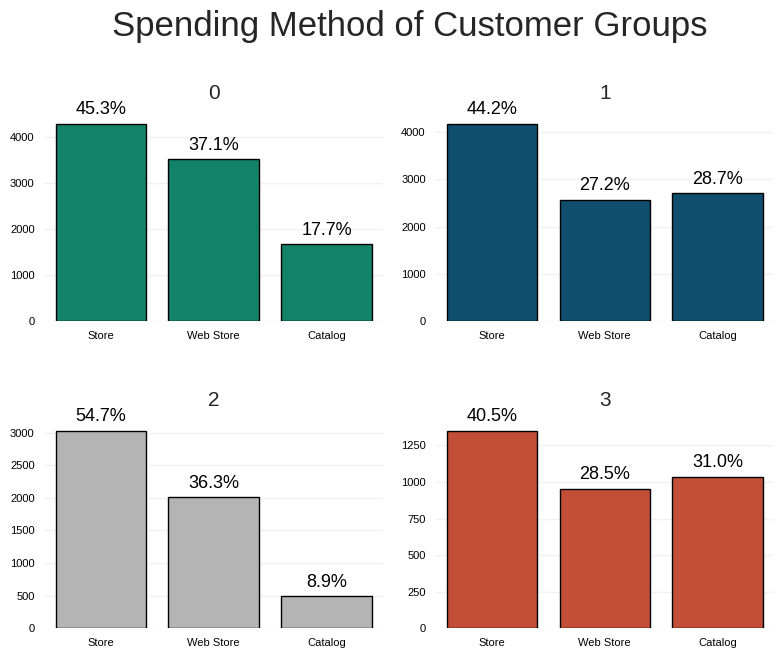

In [43]:
fig = plt.figure(figsize=(8, 6)) 
k = 1
cl = [0,1,2,3]
for i in cl:
    asset = spending_by_store[['Category', i]]
    plt.subplot(2, 2, k)
    plt.title(i, size = 15, x = 0.5, y = 1.03)
    plt.grid(color = 'gray', linestyle = '-', axis = 'y', alpha = 0.1)
    cluster_color = pal[k-1]
    a = sns.barplot(data = asset, x = 'Category', y = i, color = cluster_color, linestyle = "-", linewidth = 1, edgecolor = "black")
    plt.xticks(size = 8, color = 'black')
    plt.yticks(size = 8, color = 'black')
    plt.xlabel('')
    plt.ylabel('')
    for p in a.patches:
        x_pos = p.get_x() + p.get_width() / 2
        y_pos = p.get_height()  
        percentage = round((y_pos / sum(asset[i])) * 100, 1)
        a.annotate(
            f'{percentage}%', 
            xy=(x_pos, y_pos), 
            ha='center', va='center', 
            size=13, 
            color='black',
            xytext = (0, 10), 
            textcoords = 'offset points')
    for spine in ['right', 'top', 'left', 'bottom']:
        a.spines[spine].set_visible(False)  
    k += 1
plt.figtext(0.15, 1.05, 'Spending Method of Customer Groups', size = 25)
fig.tight_layout(h_pad = 3)
fig.savefig('store_plot.png')
plt.show()

In [44]:
#Displays saved image of figure in case Rise does not display original well
'''from PIL import Image
image = Image.open('store_plot')
image.show()'''

"from PIL import Image\nimage = Image.open('store_plot')\nimage.show()"

## Campaign Acceptance

In [45]:
data = data.rename(columns = {'AcceptedCmp1' : 'Campaign 1',
                              'AcceptedCmp2' : 'Campaign 2',
                              'AcceptedCmp3' : 'Campaign 3',
                              'AcceptedCmp4' : 'Campaign 4',
                              'AcceptedCmp5' : 'Campaign 5'})

spending_by_camp = data.groupby('Clusters')[['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5']].sum()
spending_by_camp = spending_by_camp.transpose()
spending_by_camp = spending_by_camp.reset_index()
spending_by_camp = spending_by_camp.rename(columns = {'index': 'Category'})

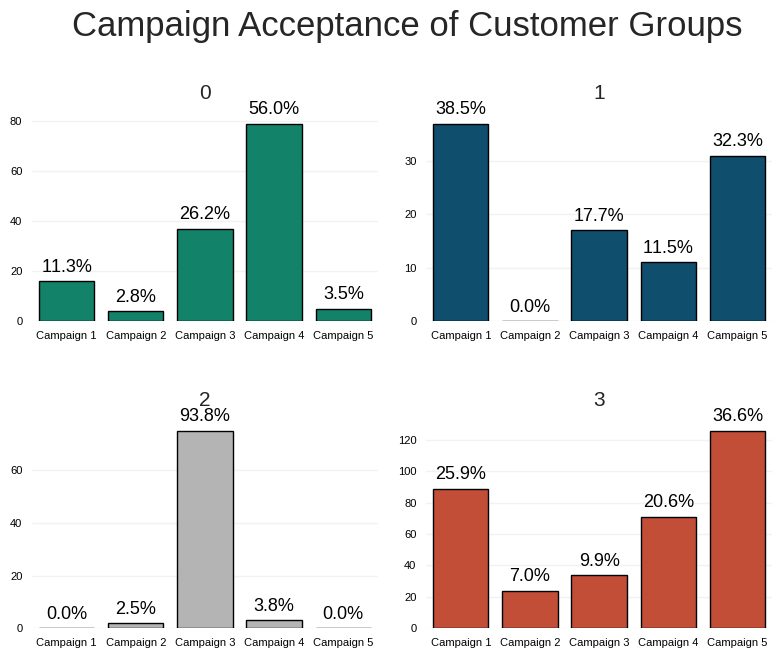

In [46]:
fig = plt.figure(figsize=(8, 6)) 
k = 1
cl = [0,1,2,3]
for i in cl:
    asset = spending_by_camp[['Category', i]]
    plt.subplot(2, 2, k)
    plt.title(i, size = 15, x = 0.5, y = 1.03)
    plt.grid(color = 'gray', linestyle = '-', axis = 'y', alpha = 0.1)
    cluster_color = pal[k-1]
    a = sns.barplot(data = asset, x = 'Category', y = i, color = cluster_color, linestyle = "-", linewidth = 1, edgecolor = "black")
    plt.xticks(size = 8, color = 'black')
    plt.yticks(size = 8, color = 'black')
    plt.xlabel('')
    plt.ylabel('')
    for p in a.patches:
        x_pos = p.get_x() + p.get_width() / 2
        y_pos = p.get_height()  
        percentage = round((y_pos / sum(asset[i])) * 100, 1)
        a.annotate(
            f'{percentage}%', 
            xy=(x_pos, y_pos), 
            ha='center', va='center', 
            size=13, 
            color='black',
            xytext = (0, 10), 
            textcoords = 'offset points')
    for spine in ['right', 'top', 'left', 'bottom']:
        a.spines[spine].set_visible(False)  
    k += 1
plt.figtext(0.1, 1.05, 'Campaign Acceptance of Customer Groups', size = 25)
fig.tight_layout(h_pad = 3)
fig.savefig('camp_plot.png')
plt.show()

In [47]:
#Displays saved image of figure in case Rise does not display original well
'''from PIL import Image
image = Image.open('camp_plot')
image.show()'''

"from PIL import Image\nimage = Image.open('camp_plot')\nimage.show()"

## Spending Based on Age

In [48]:
data = data.drop(data[data['Year_Birth'] == 1893.000000].index)
data = data.drop(data[data['Year_Birth'] == 1899.000000].index)
data = data.drop(data[data['Year_Birth'] == 1900.000000].index)

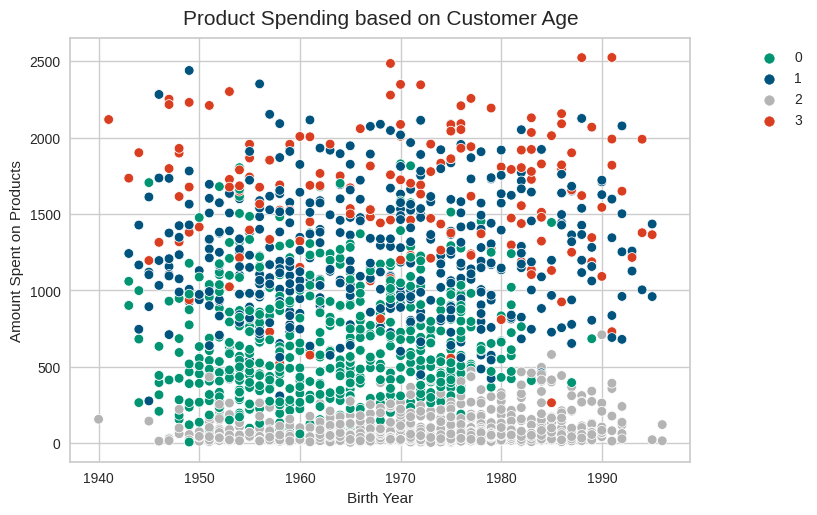

In [49]:
pl = sns.scatterplot(data = data, x = data['Year_Birth'], y = data['Spent'], hue = data['Clusters'], palette = pal)
pl.set_title('Product Spending based on Customer Age', pad=10, size=15)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.2, 1))
plt.xlabel('Birth Year')
plt.ylabel('Amount Spent on Products')
plt.show()

## Distribution of Marital Status

In [50]:
data = data.drop(data[data['Marital_Status'] == 'YOLO'].index)
data = data.drop(data[data['Marital_Status'] == 'Absurd'].index)
data = data.drop(data[data['Marital_Status'] == 'Alone'].index)

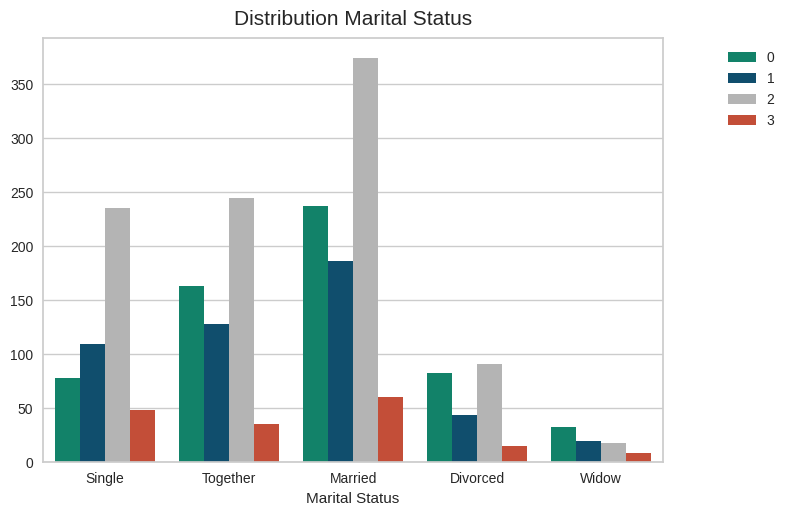

In [51]:
pl = sns.countplot(x=data["Marital_Status"], hue = data['Clusters'], palette= pal)
pl.set_title("Distribution Marital Status", pad=10, size = 15)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.2, 1))
plt.xlabel('Marital Status')
plt.ylabel('')
plt.show()

## Distribution of Family

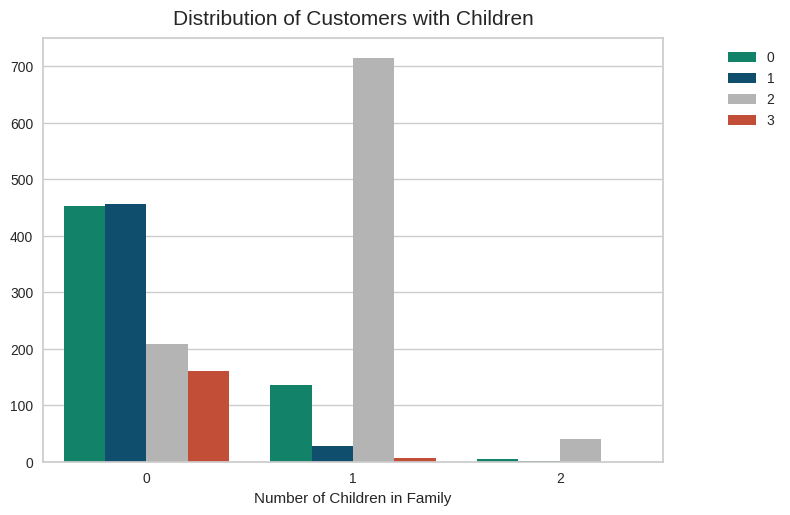

In [52]:
pl = sns.countplot(x=data["Kidhome"], hue = data['Clusters'], palette= pal)
pl.set_title("Distribution of Customers with Children", pad=10, size = 15)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.2, 1))
plt.xlabel('Number of Children in Family')
plt.ylabel('')
plt.show()

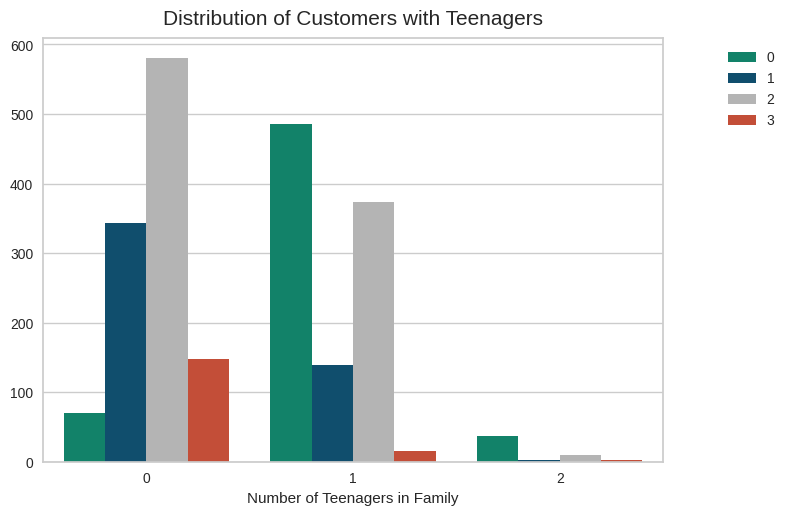

In [53]:
pl = sns.countplot(x=data["Teenhome"], hue = data['Clusters'], palette= pal)
pl.set_title("Distribution of Customers with Teenagers", pad=10, size = 15)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.2, 1))
plt.xlabel('Number of Teenagers in Family')
plt.ylabel('')
plt.show()

## Distribution of Education Level

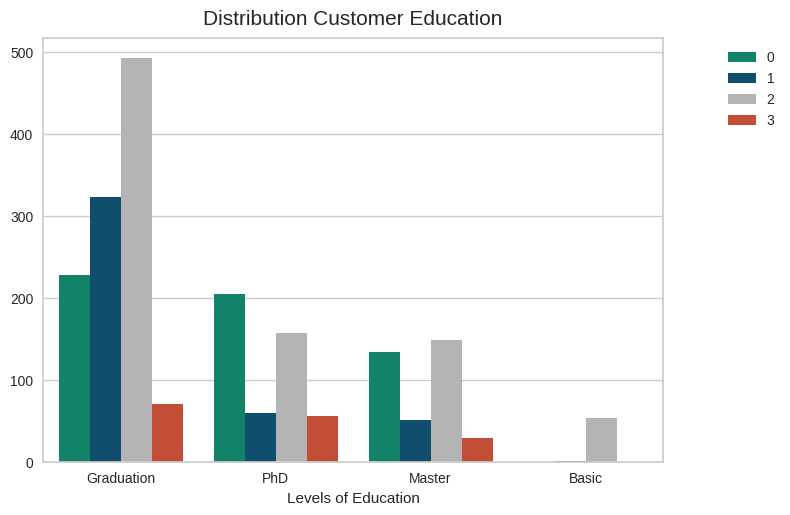

In [54]:
data = data.drop(data[data['Education'] == '2n Cycle'].index)
pl = sns.countplot(x=data["Education"], hue = data['Clusters'], palette= pal)
pl.set_title("Distribution Customer Education", pad=10, size = 15)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.2, 1))
plt.xlabel('Levels of Education')
plt.ylabel('')
plt.show()

# Conclusion

In conclusion, after examining the data from each of the clusters and the group of customers, the products the customers purchase the most are wine and meat products, and customers primarily go to the physical store to purchase and pick up these products. 

Lastly, the ideal customer for the store are customers that are generally older and have presummably at least a college degree. The ideal customer also is primarily married or in a relationship, and they typically do not have children or teenagers living with them. 